In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
from scipy.signal import argrelextrema
from scipy import integrate as intg
from scipy.misc import derivative
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy import stats
import glob



In [73]:
data_array=[]

for ifile in glob.iglob('dataset_example_ITA/Time_series/Simulation_*.csv'):
    print(ifile)
    df = pd.read_csv(ifile)
    df.drop(columns=df.columns[0], axis=1,  inplace=True)

  #  df = df.drop('Time', axis=1)
    
    data_array.append(df)

dataset_example_ITA/Time_series\Simulation_1.csv
dataset_example_ITA/Time_series\Simulation_2.csv


In [74]:
df_dmg_sim = pd.read_csv('dataset_example_ITA/Damage_simulations.csv')
df_dmg_sim

,Simulation_ID,Dmg_coord_x,Dmg_coord_y,Dmg_coord_z,Dmg_size,Dmg_orient_x,Dmg_orient_y,Dmg_orient_z,Dmg_type
0,1,0,0.35,0,0.00,0,0,0,delamination
1,2,0,0.35,0,0.15,0,0,0,delamination


In [75]:
time = []
sensors = []

for df in data_array:
    time.append(df.iloc[:,0].values)
    sensors_df = []

    for i in range(1, 5):
        sensors_df.append(df.iloc[:,i])

    sensors.append(sensors_df)

In [76]:
np.array(sensors).shape, np.array(sensors[0]).shape, np.array(sensors[0][0]).shape, np.array(sensors)[:,0].shape

len(np.array(sensors[0][0]))

501

In the stage 1 of the feature engineering, we will build a total of 18 simple statistical features —
1. mean
2. standard deviation
3. average absolute deviation
4. minimum value
5. maximum value
6. difference of maximum and minimum values
7. median
8. median absolute deviation
9. interquartile range
10. negative values count
11. positive values count
12. number of values above mean
13. number of peaks
14. skewness
15. kurtosis
16. energy
17. average resultant acceleration
18. signal magnitude area

In [77]:
X = pd.DataFrame()

sensor1_list = list(np.array(sensors)[:,0])
sensor2_list = list(np.array(sensors)[:,1])
sensor3_list = list(np.array(sensors)[:,2])
sensor4_list = list(np.array(sensors)[:,3])


# mean
X['Sensor1_mean'] = pd.Series(sensor1_list).apply(lambda x: x.mean())
X['Sensor2_mean'] = pd.Series(sensor2_list).apply(lambda x: x.mean())
X['Sensor3_mean'] = pd.Series(sensor3_list).apply(lambda x: x.mean())
X['Sensor4_mean'] = pd.Series(sensor4_list).apply(lambda x: x.mean())

# std dev
X['Sensor1_std'] = pd.Series(sensor1_list).apply(lambda x: x.std())
X['Sensor2_std'] = pd.Series(sensor2_list).apply(lambda x: x.std())
X['Sensor3_std'] = pd.Series(sensor3_list).apply(lambda x: x.std())
X['Sensor4_std'] = pd.Series(sensor4_list).apply(lambda x: x.std())

# avg absolute diff
X['Sensor1_aad'] = pd.Series(sensor1_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor2_aad'] = pd.Series(sensor2_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor3_aad'] = pd.Series(sensor3_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor4_aad'] = pd.Series(sensor4_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X['Sensor1_min'] = pd.Series(sensor1_list).apply(lambda x: x.min())
X['Sensor2_min'] = pd.Series(sensor2_list).apply(lambda x: x.min())
X['Sensor3_min'] = pd.Series(sensor3_list).apply(lambda x: x.min())
X['Sensor4_min'] = pd.Series(sensor4_list).apply(lambda x: x.min())

# max
X['Sensor1_max'] = pd.Series(sensor1_list).apply(lambda x: x.max())
X['Sensor2_max'] = pd.Series(sensor2_list).apply(lambda x: x.max())
X['Sensor3_max'] = pd.Series(sensor3_list).apply(lambda x: x.max())
X['Sensor4_max'] = pd.Series(sensor4_list).apply(lambda x: x.max())

# max-min diff
X['Sensor1_maxmin_diff'] = X['Sensor1_max'] - X['Sensor1_min']
X['Sensor2_maxmin_diff'] = X['Sensor2_max'] - X['Sensor2_min']
X['Sensor3_maxmin_diff'] = X['Sensor3_max'] - X['Sensor3_min']
X['Sensor4_maxmin_diff'] = X['Sensor4_max'] - X['Sensor4_min']


# median
X['Sensor1_median'] = pd.Series(sensor1_list).apply(lambda x: np.median(x))
X['Sensor2_median'] = pd.Series(sensor2_list).apply(lambda x: np.median(x))
X['Sensor3_median'] = pd.Series(sensor3_list).apply(lambda x: np.median(x))
X['Sensor4_median'] = pd.Series(sensor4_list).apply(lambda x: np.median(x))


# median abs dev 
X['Sensor1_mad'] = pd.Series(sensor1_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor2_mad'] = pd.Series(sensor2_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor3_mad'] = pd.Series(sensor3_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor4_mad'] = pd.Series(sensor4_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))


# interquartile range
X['Sensor1_IQR'] = pd.Series(sensor1_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor2_IQR'] = pd.Series(sensor2_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor3_IQR'] = pd.Series(sensor3_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor4_IQR'] = pd.Series(sensor4_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negative count
X['Sensor1_neg_count'] = pd.Series(sensor1_list).apply(lambda x: np.sum(x < 0))
X['Sensor2_neg_count'] = pd.Series(sensor2_list).apply(lambda x: np.sum(x < 0))
X['Sensor3_neg_count'] = pd.Series(sensor3_list).apply(lambda x: np.sum(x < 0))
X['Sensor4_neg_count'] = pd.Series(sensor4_list).apply(lambda x: np.sum(x < 0))


# positive count
X['Sensor1_pos_count'] = pd.Series(sensor1_list).apply(lambda x: np.sum(x > 0))
X['Sensor2_pos_count'] = pd.Series(sensor2_list).apply(lambda x: np.sum(x > 0))
X['Sensor3_pos_count'] = pd.Series(sensor3_list).apply(lambda x: np.sum(x > 0))
X['Sensor4_pos_count'] = pd.Series(sensor4_list).apply(lambda x: np.sum(x > 0))

# values above mean
X['Sensor1_above_mean'] = pd.Series(sensor1_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor2_above_mean'] = pd.Series(sensor2_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor3_above_mean'] = pd.Series(sensor3_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor4_above_mean'] = pd.Series(sensor4_list).apply(lambda x: np.sum(x > x.mean()))


# number of peaks
X['Sensor1_peak_count'] = pd.Series(sensor1_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor2_peak_count'] = pd.Series(sensor2_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor3_peak_count'] = pd.Series(sensor3_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor4_peak_count'] = pd.Series(sensor4_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X['Sensor1_skewness'] = pd.Series(sensor1_list).apply(lambda x: stats.skew(x))
X['Sensor2_skewness'] = pd.Series(sensor2_list).apply(lambda x: stats.skew(x))
X['Sensor3_skewness'] = pd.Series(sensor3_list).apply(lambda x: stats.skew(x))
X['Sensor4_skewness'] = pd.Series(sensor4_list).apply(lambda x: stats.skew(x))


# kurtosis
X['Sensor1_kurtosis'] = pd.Series(sensor1_list).apply(lambda x: stats.kurtosis(x))
X['Sensor2_kurtosis'] = pd.Series(sensor2_list).apply(lambda x: stats.kurtosis(x))
X['Sensor3_kurtosis'] = pd.Series(sensor3_list).apply(lambda x: stats.kurtosis(x))
X['Sensor4_kurtosis'] = pd.Series(sensor4_list).apply(lambda x: stats.kurtosis(x))

signal_length = len(np.array(sensors[0][0]))
# energy
X['Sensor1_energy'] = pd.Series(sensor1_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor2_energy'] = pd.Series(sensor2_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor3_energy'] = pd.Series(sensor3_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor4_energy'] = pd.Series(sensor4_list).apply(lambda x: np.sum(x**2) / signal_length)


# avg resultant
X['avg_result_signal'] = [i.mean() for i in ((pd.Series(sensor1_list)**2 + pd.Series(sensor2_list)**2 + pd.Series(sensor3_list)**2 + pd.Series(sensor4_list)**2)**0.5)]

# signal magnitude area
X['sma'] = pd.Series(sensor1_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor2_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor3_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor4_list).apply(lambda x: np.sum(abs(x)/signal_length))



In [78]:
X.head()

,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,Sensor1_std,Sensor2_std,Sensor3_std,Sensor4_std,Sensor1_aad,Sensor2_aad,...,Sensor1_kurtosis,Sensor2_kurtosis,Sensor3_kurtosis,Sensor4_kurtosis,Sensor1_energy,Sensor2_energy,Sensor3_energy,Sensor4_energy,avg_result_signal,sma
0,-0.003844,2.670774e-07,0.000253,0.000008,1.758534,0.003471,0.058952,0.004317,0.279369,0.002336,...,60.438318,1.693651,28.917020,0.483717,3.092456,0.000012,0.003475,0.000019,0.296509,0.303280
1,-0.003844,7.436608e-07,0.000255,0.000005,1.758534,0.005032,0.059292,0.007437,0.279369,0.003270,...,60.438318,2.695856,28.281317,1.476637,3.092456,0.000025,0.003516,0.000055,0.298537,0.306522


In [79]:
#function to get the fft transform. The outputs (frequency, amplitude) are sorted according to frequency in increasing order.
#The amplitude output of the fft is a complex number. The function returns its absolute value (length).

def get_FFT_transform( input, duration, N_points ):

    sample_rate = float(N_points / duration)

    yf = fft(input) # this is a complex number. 
    xf = fftfreq(N_points, 1 / sample_rate)
    #xf = fftfreq(N_points, 1 )

    #now we sort xf in increasing order and apply the same ordering on yf.
    sorted_xf = np.sort(xf)
    sorted_yf = yf[np.argsort(xf)]

    return sorted_xf, np.abs(sorted_yf)

In [80]:
time[0][len(time[0])-1]-time[0][0]

0.00025

In [81]:
len(sensors)

2

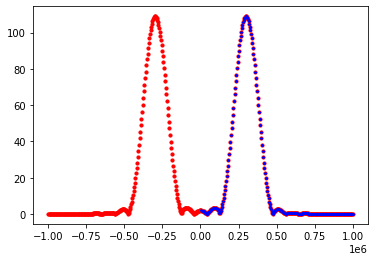

In [82]:
duration = time[0][len(time[0])-1]-time[0][0]

Sensor1_freq, Sensor1_amp = get_FFT_transform(np.array(sensors[0][0]), duration , signal_length )

Sensor1_amp_pos  = Sensor1_amp[np.argwhere(Sensor1_freq>0).reshape(-1)]
Sensor1_freq_pos = Sensor1_freq[Sensor1_freq>0] # FFT frequences are completely symmetrical around zero. We want keep only the positive ones.
#Sensor1_amp_pos  = Sensor1_amp[np.argwhere(Sensor1_freq>0).reshape(-1)]


plt.scatter(Sensor1_freq, Sensor1_amp, marker='o', s=10,label='sensor 1', color = 'red')
plt.scatter(Sensor1_freq_pos, Sensor1_amp[np.argwhere(Sensor1_freq>0).reshape(-1)], marker='*', s=5,label='sensor 1', color = 'blue')


#xf_2, yf_2 = get_FFT_transform(np.array(sensors[sim_ID][1]), duration, N_points )
#xf_3, yf_3 = get_FFT_transform(np.array(sensors[sim_ID][2]), duration, N_points )
#xf_4, yf_4 = get_FFT_transform(np.array(sensors[sim_ID][3]), duration, N_points )

In [83]:
len(np.array(sensors[0][0])), len(np.array(sensor1_list[0])), len(np.array(sensor1_amp_list[0]))

(501, 501, 250)

In [84]:
len(np.array(sensor1_list[0]))

501

In [85]:
len(sensors[0])

4

In [86]:

sensor1_freq_list = []
sensor2_freq_list = []
sensor3_freq_list = []
sensor4_freq_list = []

sensor1_amp_list = []
sensor2_amp_list = []
sensor3_amp_list = []
sensor4_amp_list = []


for simID in range(0,len(sensors)):

    duration = time[simID][len(time[simID])-1]-time[simID][0]
    signal_length = len(np.array(sensor1_list[simID]))

    Sensor1_freq, Sensor1_amp = get_FFT_transform(np.array(sensors[simID][0]), duration , signal_length )
    Sensor2_freq, Sensor2_amp = get_FFT_transform(np.array(sensors[simID][1]), duration , signal_length )
    Sensor3_freq, Sensor3_amp = get_FFT_transform(np.array(sensors[simID][2]), duration , signal_length )
    Sensor4_freq, Sensor4_amp = get_FFT_transform(np.array(sensors[simID][3]), duration , signal_length )


    # FFT frequences are completely symmetrical around zero. We want keep only the positive ones.

    Sensor1_amp  = Sensor1_amp[np.argwhere(Sensor1_freq>0).reshape(-1)]
    Sensor1_freq = Sensor1_freq[Sensor1_freq>0] 

    Sensor2_amp  = Sensor2_amp[np.argwhere(Sensor2_freq>0).reshape(-1)]
    Sensor2_freq = Sensor2_freq[Sensor2_freq>0] 

    Sensor3_amp  = Sensor3_amp[np.argwhere(Sensor3_freq>0).reshape(-1)]
    Sensor3_freq = Sensor3_freq[Sensor3_freq>0] 

    Sensor4_amp  = Sensor4_amp[np.argwhere(Sensor4_freq>0).reshape(-1)]
    Sensor4_freq = Sensor4_freq[Sensor4_freq>0] 


    # Append the amplitudes and frequences into corresponding lists.
    sensor1_freq_list.append(Sensor1_freq)
    sensor1_amp_list.append(Sensor1_amp)

    sensor2_freq_list.append(Sensor2_freq)
    sensor2_amp_list.append(Sensor2_amp)

    sensor3_freq_list.append(Sensor3_freq)
    sensor3_amp_list.append(Sensor3_amp)

    sensor4_freq_list.append(Sensor4_freq)
    sensor4_amp_list.append(Sensor4_amp)


    


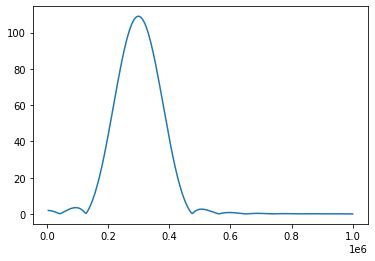

In [87]:
plt.plot(sensor1_freq_list[0],sensor1_amp_list[0])

In [88]:
# mean
X['Sensor1_fft_mean'] = pd.Series(sensor1_amp_list).apply(lambda x: x.mean())
X['Sensor2_fft_mean'] = pd.Series(sensor2_amp_list).apply(lambda x: x.mean())
X['Sensor3_fft_mean'] = pd.Series(sensor3_amp_list).apply(lambda x: x.mean())
X['Sensor4_fft_mean'] = pd.Series(sensor4_amp_list).apply(lambda x: x.mean())

# std dev
X['Sensor1_fft_std'] = pd.Series(sensor1_amp_list).apply(lambda x: x.std())
X['Sensor2_fft_std'] = pd.Series(sensor2_amp_list).apply(lambda x: x.std())
X['Sensor3_fft_std'] = pd.Series(sensor3_amp_list).apply(lambda x: x.std())
X['Sensor4_fft_std'] = pd.Series(sensor4_amp_list).apply(lambda x: x.std())

# avg absolute diff
X['Sensor1_fft_aad'] = pd.Series(sensor1_amp_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor2_fft_aad'] = pd.Series(sensor2_amp_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor3_fft_aad'] = pd.Series(sensor3_amp_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X['Sensor4_fft_aad'] = pd.Series(sensor4_amp_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X['Sensor1_fft_min'] = pd.Series(sensor1_amp_list).apply(lambda x: x.min())
X['Sensor2_fft_min'] = pd.Series(sensor2_amp_list).apply(lambda x: x.min())
X['Sensor3_fft_min'] = pd.Series(sensor3_amp_list).apply(lambda x: x.min())
X['Sensor4_fft_min'] = pd.Series(sensor4_amp_list).apply(lambda x: x.min())

# max
X['Sensor1_fft_max'] = pd.Series(sensor1_amp_list).apply(lambda x: x.max())
X['Sensor2_fft_max'] = pd.Series(sensor2_amp_list).apply(lambda x: x.max())
X['Sensor3_fft_max'] = pd.Series(sensor3_amp_list).apply(lambda x: x.max())
X['Sensor4_fft_max'] = pd.Series(sensor4_amp_list).apply(lambda x: x.max())

# max-min diff
X['Sensor1_fft_maxmin_diff'] = X['Sensor1_fft_max'] - X['Sensor1_fft_min']
X['Sensor2_fft_maxmin_diff'] = X['Sensor2_fft_max'] - X['Sensor2_fft_min']
X['Sensor3_fft_maxmin_diff'] = X['Sensor3_fft_max'] - X['Sensor3_fft_min']
X['Sensor4_fft_maxmin_diff'] = X['Sensor4_fft_max'] - X['Sensor4_fft_min']


# median
X['Sensor1_fft_median'] = pd.Series(sensor1_amp_list).apply(lambda x: np.median(x))
X['Sensor2_fft_median'] = pd.Series(sensor2_amp_list).apply(lambda x: np.median(x))
X['Sensor3_fft_median'] = pd.Series(sensor3_amp_list).apply(lambda x: np.median(x))
X['Sensor4_fft_median'] = pd.Series(sensor4_amp_list).apply(lambda x: np.median(x))


# median abs dev 
X['Sensor1_fft_mad'] = pd.Series(sensor1_amp_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor2_fft_mad'] = pd.Series(sensor2_amp_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor3_fft_mad'] = pd.Series(sensor3_amp_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X['Sensor4_fft_mad'] = pd.Series(sensor4_amp_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))


# interquartile range
X['Sensor1_fft_IQR'] = pd.Series(sensor1_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor2_fft_IQR'] = pd.Series(sensor2_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor3_fft_IQR'] = pd.Series(sensor3_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X['Sensor4_fft_IQR'] = pd.Series(sensor4_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negative count
#X['Sensor1_fft_neg_count'] = pd.Series(sensor1_amp_list).apply(lambda x: np.sum(x < 0))
#X['Sensor2_fft_neg_count'] = pd.Series(sensor2_amp_list).apply(lambda x: np.sum(x < 0))
#X['Sensor3_fft_neg_count'] = pd.Series(sensor3_amp_list).apply(lambda x: np.sum(x < 0))
#X['Sensor4_fft_neg_count'] = pd.Series(sensor4_amp_list).apply(lambda x: np.sum(x < 0))


# positive count
#X['Sensor1_fft_pos_count'] = pd.Series(sensor1_amp_list).apply(lambda x: np.sum(x > 0))
#X['Sensor2_fft_pos_count'] = pd.Series(sensor2_amp_list).apply(lambda x: np.sum(x > 0))
#X['Sensor3_fft_pos_count'] = pd.Series(sensor3_amp_list).apply(lambda x: np.sum(x > 0))
#X['Sensor4_fft_pos_count'] = pd.Series(sensor4_amp_list).apply(lambda x: np.sum(x > 0))

# values above mean
X['Sensor1_fft_above_mean'] = pd.Series(sensor1_amp_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor2_fft_above_mean'] = pd.Series(sensor2_amp_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor3_fft_above_mean'] = pd.Series(sensor3_amp_list).apply(lambda x: np.sum(x > x.mean()))
X['Sensor4_fft_above_mean'] = pd.Series(sensor4_amp_list).apply(lambda x: np.sum(x > x.mean()))


# number of peaks
X['Sensor1_fft_peak_count'] = pd.Series(sensor1_amp_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor2_fft_peak_count'] = pd.Series(sensor2_amp_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor3_fft_peak_count'] = pd.Series(sensor3_amp_list).apply(lambda x: len(find_peaks(x)[0]))
X['Sensor4_fft_peak_count'] = pd.Series(sensor4_amp_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X['Sensor1_fft_skewness'] = pd.Series(sensor1_amp_list).apply(lambda x: stats.skew(x))
X['Sensor2_fft_skewness'] = pd.Series(sensor2_amp_list).apply(lambda x: stats.skew(x))
X['Sensor3_fft_skewness'] = pd.Series(sensor3_amp_list).apply(lambda x: stats.skew(x))
X['Sensor4_fft_skewness'] = pd.Series(sensor4_amp_list).apply(lambda x: stats.skew(x))


# kurtosis
X['Sensor1_fft_kurtosis'] = pd.Series(sensor1_amp_list).apply(lambda x: stats.kurtosis(x))
X['Sensor2_fft_kurtosis'] = pd.Series(sensor2_amp_list).apply(lambda x: stats.kurtosis(x))
X['Sensor3_fft_kurtosis'] = pd.Series(sensor3_amp_list).apply(lambda x: stats.kurtosis(x))
X['Sensor4_fft_kurtosis'] = pd.Series(sensor4_amp_list).apply(lambda x: stats.kurtosis(x))

signal_length = len(np.array(sensor1_amp_list[0]))
# energy
X['Sensor1_fft_energy'] = pd.Series(sensor1_amp_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor2_fft_energy'] = pd.Series(sensor2_amp_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor3_fft_energy'] = pd.Series(sensor3_amp_list).apply(lambda x: np.sum(x**2) / signal_length)
X['Sensor4_fft_energy'] = pd.Series(sensor4_amp_list).apply(lambda x: np.sum(x**2) / signal_length)


# avg resultant
X['avg_result_signal_fft'] = [i.mean() for i in ((pd.Series(sensor1_amp_list)**2 + pd.Series(sensor2_amp_list)**2 + pd.Series(sensor3_amp_list)**2 + pd.Series(sensor4_amp_list)**2)**0.5)]

# signal magnitude area
X['sma_fft'] = pd.Series(sensor1_amp_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor2_amp_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor3_amp_list).apply(lambda x: np.sum(abs(x)/signal_length)) + pd.Series(sensor4_amp_list).apply(lambda x: np.sum(abs(x)/signal_length))



C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\43632631.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sensor3_fft_IQR'] = pd.Series(sensor3_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\43632631.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sensor4_fft_IQR'] = pd.Series(sensor4_amp_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\43632631.py:59: Performance

In [89]:
X.head()

,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,Sensor1_std,Sensor2_std,Sensor3_std,Sensor4_std,Sensor1_aad,Sensor2_aad,...,Sensor1_fft_kurtosis,Sensor2_fft_kurtosis,Sensor3_fft_kurtosis,Sensor4_fft_kurtosis,Sensor1_fft_energy,Sensor2_fft_energy,Sensor3_fft_energy,Sensor4_fft_energy,avg_result_signal_fft,sma_fft
0,-0.003844,2.670774e-07,0.000253,0.000008,1.758534,0.003471,0.058952,0.004317,0.279369,0.002336,...,1.014503,5.130813,5.082343,10.161678,1552.411656,0.006050,1.744605,0.009357,19.685810,20.301813
1,-0.003844,7.436608e-07,0.000255,0.000005,1.758534,0.005032,0.059292,0.007437,0.279369,0.003270,...,1.014503,14.781300,5.124586,11.092091,1552.411656,0.012713,1.764796,0.027768,19.686297,20.343731


In [90]:
# Max Indices and Min indices 

# index of max value in time domain
X['Sensor1_argmax'] = pd.Series(sensor1_list).apply(lambda x: np.argmax(x))
X['Sensor2_argmax'] = pd.Series(sensor2_list).apply(lambda x: np.argmax(x))
X['Sensor3_argmax'] = pd.Series(sensor3_list).apply(lambda x: np.argmax(x))
X['Sensor4_argmax'] = pd.Series(sensor4_list).apply(lambda x: np.argmax(x))


# index of min value in time domain
X['Sensor1_argmin'] = pd.Series(sensor1_list).apply(lambda x: np.argmin(x))
X['Sensor2_argmin'] = pd.Series(sensor2_list).apply(lambda x: np.argmin(x))
X['Sensor3_argmin'] = pd.Series(sensor3_list).apply(lambda x: np.argmin(x))
X['Sensor4_argmin'] = pd.Series(sensor4_list).apply(lambda x: np.argmin(x))


# absolute difference between above indices
X['Sensor1_arg_diff'] = abs(X['Sensor1_argmax'] - X['Sensor1_argmin'])
X['Sensor2_arg_diff'] = abs(X['Sensor2_argmax'] - X['Sensor2_argmin'])
X['Sensor3_arg_diff'] = abs(X['Sensor3_argmax'] - X['Sensor3_argmin'])
X['Sensor4_arg_diff'] = abs(X['Sensor4_argmax'] - X['Sensor4_argmin'])


# index of max value in frequency domain
X['Sensor1_argmax_fft'] = pd.Series(sensor1_amp_list).apply(lambda x: np.argmax(x))
X['Sensor2_argmax_fft'] = pd.Series(sensor2_amp_list).apply(lambda x: np.argmax(x))
X['Sensor3_argmax_fft'] = pd.Series(sensor3_amp_list).apply(lambda x: np.argmax(x))
X['Sensor4_argmax_fft'] = pd.Series(sensor4_amp_list).apply(lambda x: np.argmax(x))


# index of min value in frequency domain
X['Sensor1_argmin_fft'] = pd.Series(sensor1_amp_list).apply(lambda x: np.argmin(x))
X['Sensor2_argmin_fft'] = pd.Series(sensor2_amp_list).apply(lambda x: np.argmin(x))
X['Sensor3_argmin_fft'] = pd.Series(sensor3_amp_list).apply(lambda x: np.argmin(x))
X['Sensor4_argmin_fft'] = pd.Series(sensor4_amp_list).apply(lambda x: np.argmin(x))


# absolute difference between above indices
X['Sensor1_arg_diff_fft'] = abs(X['Sensor1_argmax_fft'] - X['Sensor1_argmin_fft'])
X['Sensor2_arg_diff_fft'] = abs(X['Sensor2_argmax_fft'] - X['Sensor2_argmin_fft'])
X['Sensor3_arg_diff_fft'] = abs(X['Sensor3_argmax_fft'] - X['Sensor3_argmin_fft'])
X['Sensor4_arg_diff_fft'] = abs(X['Sensor4_argmax_fft'] - X['Sensor4_argmin_fft'])

C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\4204873090.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sensor1_argmax'] = pd.Series(sensor1_list).apply(lambda x: np.argmax(x))
C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\4204873090.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['Sensor2_argmax'] = pd.Series(sensor2_list).apply(lambda x: np.argmax(x))
C:\Users\Dimitris\AppData\Local\Temp\ipykernel_43900\4204873090.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [91]:
X.head()

,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,Sensor1_std,Sensor2_std,Sensor3_std,Sensor4_std,Sensor1_aad,Sensor2_aad,...,Sensor3_argmax_fft,Sensor4_argmax_fft,Sensor1_argmin_fft,Sensor2_argmin_fft,Sensor3_argmin_fft,Sensor4_argmin_fft,Sensor1_arg_diff_fft,Sensor2_arg_diff_fft,Sensor3_arg_diff_fft,Sensor4_arg_diff_fft
0,-0.003844,2.670774e-07,0.000253,0.000008,1.758534,0.003471,0.058952,0.004317,0.279369,0.002336,...,65,66,227,4,169,28,153,65,104,38
1,-0.003844,7.436608e-07,0.000255,0.000005,1.758534,0.005032,0.059292,0.007437,0.279369,0.003270,...,65,62,227,6,151,8,153,61,86,54


In [92]:
X['Sensor1_argmax_fft']

0    74
1    74
Name: Sensor1_argmax_fft, dtype: int64

In [93]:
sensor1_amp_list[0][74], sensor1_freq_list[0][74]

#len(sensor1_freq_list[0])

(109.0560991279299, 300000.0)

In [94]:
X.describe()

,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,Sensor1_std,Sensor2_std,Sensor3_std,Sensor4_std,Sensor1_aad,Sensor2_aad,...,Sensor3_argmax_fft,Sensor4_argmax_fft,Sensor1_argmin_fft,Sensor2_argmin_fft,Sensor3_argmin_fft,Sensor4_argmin_fft,Sensor1_arg_diff_fft,Sensor2_arg_diff_fft,Sensor3_arg_diff_fft,Sensor4_arg_diff_fft
count,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000
mean,-0.003844,5.053691e-07,0.000254,0.000006,1.758534,0.004252,0.059122,0.005877,0.279369,0.002803,...,65.0,64.000000,227.0,5.000000,160.000000,18.000000,153.0,63.000000,95.000000,46.000000
std,0.000000,3.369953e-07,0.000001,0.000002,0.000000,0.001104,0.000241,0.002206,0.000000,0.000660,...,0.0,2.828427,0.0,1.414214,12.727922,14.142136,0.0,2.828427,12.727922,11.313708
min,-0.003844,2.670774e-07,0.000253,0.000005,1.758534,0.003471,0.058952,0.004317,0.279369,0.002336,...,65.0,62.000000,227.0,4.000000,151.000000,8.000000,153.0,61.000000,86.000000,38.000000
25%,-0.003844,3.862232e-07,0.000253,0.000006,1.758534,0.003862,0.059037,0.005097,0.279369,0.002570,...,65.0,63.000000,227.0,4.500000,155.500000,13.000000,153.0,62.000000,90.500000,42.000000
50%,-0.003844,5.053691e-07,0.000254,0.000006,1.758534,0.004252,0.059122,0.005877,0.279369,0.002803,...,65.0,64.000000,227.0,5.000000,160.000000,18.000000,153.0,63.000000,95.000000,46.000000
75%,-0.003844,6.245149e-07,0.000254,0.000007,1.758534,0.004642,0.059207,0.006657,0.279369,0.003036,...,65.0,65.000000,227.0,5.500000,164.500000,23.000000,153.0,64.000000,99.500000,50.000000
max,-0.003844,7.436608e-07,0.000255,0.000008,1.758534,0.005032,0.059292,0.007437,0.279369,0.003270,...,65.0,66.000000,227.0,6.000000,169.000000,28.000000,153.0,65.000000,104.000000,54.000000


In [100]:
X = X.astype(float)

In [101]:
from pathlib import Path  
filepath = Path('dataset_example_ITA/processed_data/processed_data.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  

X.to_csv(filepath, index=False)  